### Importing liberaries & Loading Data

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.float_format','{:.6f}'.format)
df=pd.read_csv('Walmart.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.900000,0,42.310000,2.572000,211.096358,8.106000
1,1,12-02-2010,1641957.440000,1,38.510000,2.548000,211.242170,8.106000
2,1,19-02-2010,1611968.170000,0,39.930000,2.514000,211.289143,8.106000
3,1,26-02-2010,1409727.590000,0,46.630000,2.561000,211.319643,8.106000
4,1,05-03-2010,1554806.680000,0,46.500000,2.625000,211.350143,8.106000


### Quick view in Data

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [71]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1046964.877562,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,564366.622054,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,209986.250000,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,553350.105000,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,960746.040000,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1420158.660000,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3818686.450000,1.000000,100.140000,4.468000,227.232807,14.313000


In [72]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [73]:
df.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

In [74]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [75]:
df.shape

(6435, 8)

In [76]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

### Missing values


In [77]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

### Distribution

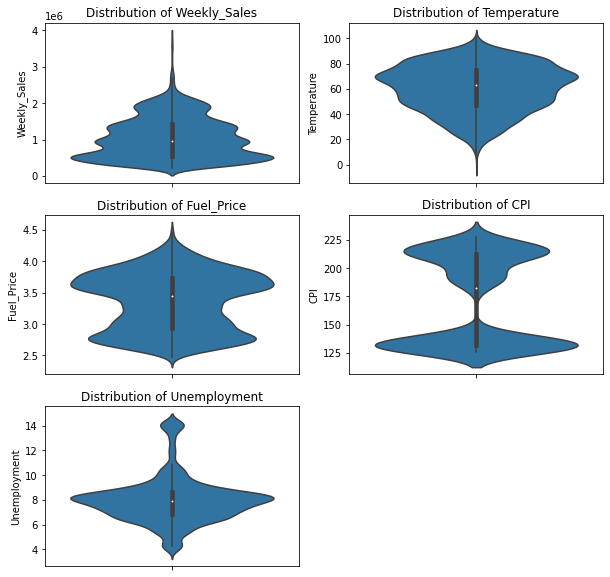

In [78]:
plt.figure(figsize=(10,10)) 
dist_cols=['Weekly_Sales', 'Temperature','Fuel_Price', 'CPI', 'Unemployment']
for i in range(0,len(dist_cols)):
    plt.subplot(3,2,i+1)
    sns.violinplot(data=df, y=dist_cols[i])
    plt.title(f'Distribution of {dist_cols[i]}')

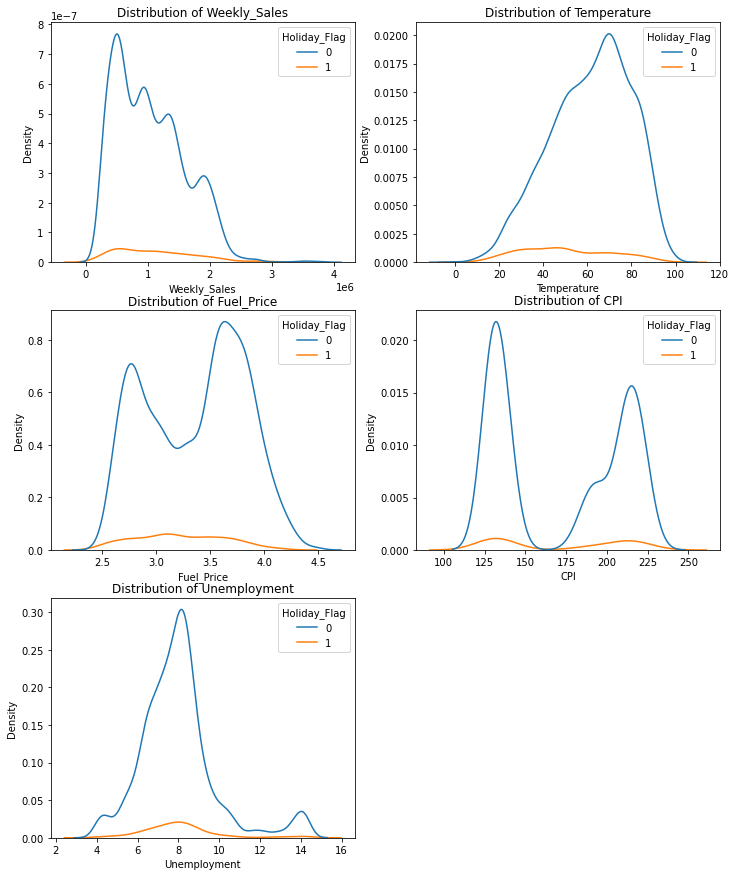

In [79]:
plt.figure(figsize=(12,15)) 
dist_cols=['Weekly_Sales', 'Temperature','Fuel_Price', 'CPI', 'Unemployment']
for i in range(0,len(dist_cols)):
    figure= plt.subplot(3,2,i+1)
    sns.kdeplot(data=df, x=dist_cols[i], hue='Holiday_Flag')
    plt.title(f'Distribution of {dist_cols[i]}')

It is clearly that we have bimodal distribution in CPI and fuel price features. So it is better to convert them later into binary variables(0 = "low", 1 = "high").

### Outliers

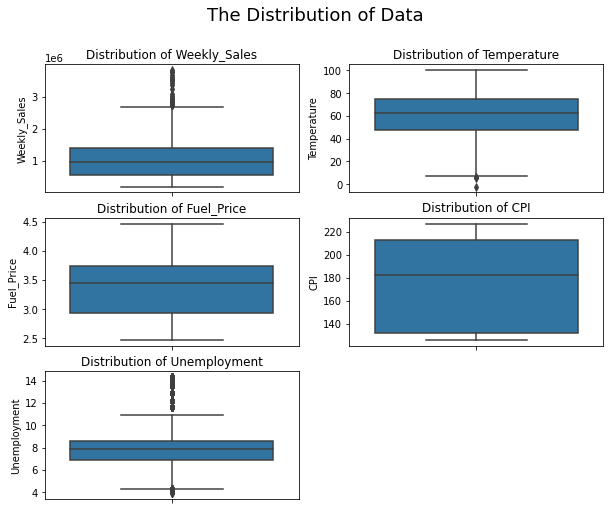

In [87]:
plt.figure(figsize=(10,8)) 
plt.suptitle('The Distribution of Data', fontsize=18)
dist_cols=['Weekly_Sales', 'Temperature','Fuel_Price', 'CPI', 'Unemployment']
for i in range(0,len(dist_cols)):
    plt.subplot(3,2,i+1)
    sns.boxplot(data=df, y=dist_cols[i])
    plt.title(f'Distribution of {dist_cols[i]}')
    

In [88]:
def remove_outlier_IQR(df, cols):
    for col in cols:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
        upper_limit= Q3+1.5*IQR
        lower_limit= Q1-1.5*IQR
        df = df[df[col] < upper_limit]
        df = df[df[col] > lower_limit]
    return df

In [89]:
df=remove_outlier_IQR(df, dist_cols)

In [90]:
df.shape

(5917, 8)

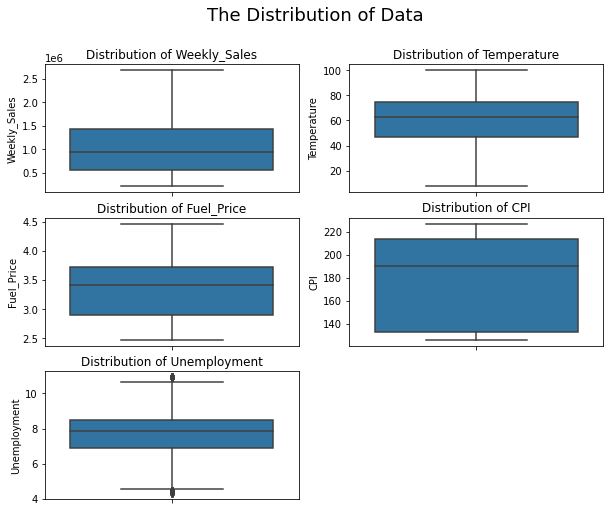

In [91]:
# Now check the data after dropping the outliers
plt.figure(figsize=(10,8)) 
plt.suptitle('The Distribution of Data', fontsize=18)
for i in range(0,len(dist_cols)):
    plt.subplot(3,2,i+1)
    sns.boxplot(data=df, y=dist_cols[i])
    plt.title(f'Distribution of {dist_cols[i]}')

### Feature engineering

In [92]:
mean_CPI= df.CPI.mean()
mean_fuel_price=df.Fuel_Price.mean()

In [93]:
# Convert CPI and Fuel price columns to (Low and High)
df['CPI']= np.where(df['CPI'] <= mean_CPI,'Low','High')
df['Fuel_Price']= np.where(df['Fuel_Price'] <= mean_fuel_price,'Low','High')
# Convert the Temperature column to (Warm, Cool, Cold, Hot) 
df['Temperature']= np.where((df['Temperature'] <= 65) & (df['Temperature'] > 45) ,'Warm',
                            np.where((df['Temperature'] <= 45) & (df['Temperature'] > 25) ,'Cool'
                            ,
                            np.where((df['Temperature'] <= 25) & (df['Temperature'] >= 10) ,'Cold'
                            ,
                            'Hot')))


In [94]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.900000,0,Cool,Low,High,8.106000
1,1,12-02-2010,1641957.440000,1,Cool,Low,High,8.106000
2,1,19-02-2010,1611968.170000,0,Cool,Low,High,8.106000
3,1,26-02-2010,1409727.590000,0,Warm,Low,High,8.106000
4,1,05-03-2010,1554806.680000,0,Warm,Low,High,8.106000
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.950000,0,Warm,High,High,8.684000
6431,45,05-10-2012,733455.070000,0,Warm,High,High,8.667000
6432,45,12-10-2012,734464.360000,0,Warm,High,High,8.667000
6433,45,19-10-2012,718125.530000,0,Warm,High,High,8.667000


In [95]:
print(df.CPI.value_counts())
print(df.Fuel_Price.value_counts())
print(df.Temperature.value_counts())

High    3274
Low     2643
Name: CPI, dtype: int64
High    3197
Low     2720
Name: Fuel_Price, dtype: int64
Hot     2702
Warm    1924
Cool    1084
Cold     207
Name: Temperature, dtype: int64


### Feature Extraction

In [96]:
# Extract the day, month, year from the Date column:
df['Date'] = pd.to_datetime(df['Date'])
df['day'] = df['Date'].dt.weekday
df['month'] = df['Date'].dt.month
df['year']  = df['Date'].dt.year
df.drop('Date',axis=1,inplace=True)
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
0,1,1643690.900000,0,Cool,Low,High,8.106000,6,5,2010
1,1,1641957.440000,1,Cool,Low,High,8.106000,3,12,2010
2,1,1611968.170000,0,Cool,Low,High,8.106000,4,2,2010
3,1,1409727.590000,0,Warm,Low,High,8.106000,4,2,2010
4,1,1554806.680000,0,Warm,Low,High,8.106000,0,5,2010


In [97]:
# Converting the numerical values to categorical values in the day, month, year, holiday flag columns
# Date column
days = {0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5: 'Friday',6:'Saturday'}
df['day'] = df['day'].map(days)
months={
1:'January',
 2:'February',
 3:'March',
 4:'April',
 5:'May',
 6:'June',
7:'July',
 8:'August',
 9:'September',
10:'October',
11:'November',
 12:'December'}
df['month']= df['month'].map(months)
# Holiday_week column
holiday_week= {1:'Holiday week', 0:'Non-holiday week'}
df['Holiday_Flag']= df['Holiday_Flag'].map(holiday_week)
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
0,1,1643690.900000,Non-holiday week,Cool,Low,High,8.106000,Saturday,May,2010
1,1,1641957.440000,Holiday week,Cool,Low,High,8.106000,Wednesday,December,2010
2,1,1611968.170000,Non-holiday week,Cool,Low,High,8.106000,Thursday,February,2010
3,1,1409727.590000,Non-holiday week,Warm,Low,High,8.106000,Thursday,February,2010
4,1,1554806.680000,Non-holiday week,Warm,Low,High,8.106000,Sunday,May,2010


### EDA & Visualization

In [98]:
# Total yearly sales
df.groupby('year')['Weekly_Sales'].sum().sort_values(ascending=False).to_frame()

,Weekly_Sales
year,
2011,2260433818.870000
2010,2097829419.810000
2012,1791351989.230000


In [99]:
# Total monthly sales
df.groupby('month')['Weekly_Sales'].sum().sort_values(ascending=False).to_frame()

,Weekly_Sales
month,
April,597307320.250000
May,563963943.460000
October,558074095.280000
July,551015551.480000
September,549170809.180000
June,527832156.500000
August,523655384.350000
March,510032348.790000
December,488244866.480000


In [100]:
# Total daily sales
df.groupby('day')['Weekly_Sales'].sum().sort_values(ascending=False).to_frame()

,Weekly_Sales
day,
Thursday,4062583562.820000
Sunday,490964935.310000
Wednesday,440277537.480000
Monday,402627762.630000
Saturday,400694866.370000
Friday,265553019.100000
Tuesday,86913544.200000


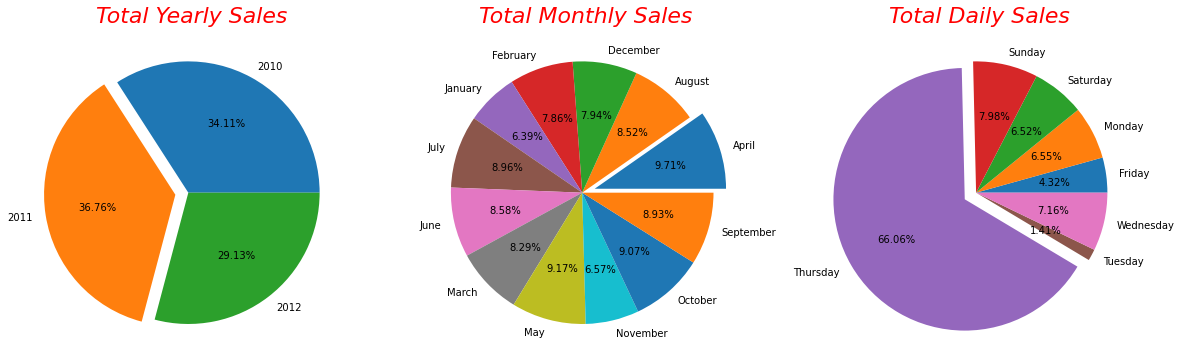

In [101]:
# Visualization
plt.figure(figsize=(20,15)) 
cols=['year','month', 'day']
titles=['Yearly','Monthly', 'Daily']
for i in range(0,len(cols)):
    figure= plt.subplot(1,3,i+1)
    vall = df.groupby(cols[i])['Weekly_Sales'].sum().values
    max_vall=max(vall)
    explode_value = tuple([0 if vall[j] != max_vall else 0.1 for j in range(len(vall))])
    plt.pie(df.groupby(cols[i])['Weekly_Sales'].sum().values, labels=df.groupby(cols[i])['Weekly_Sales'].sum().index, autopct='%.2f%%', explode=explode_value)
    plt.title(f' Total {titles[i]} Sales', color='red', fontsize= 22, fontstyle='italic')

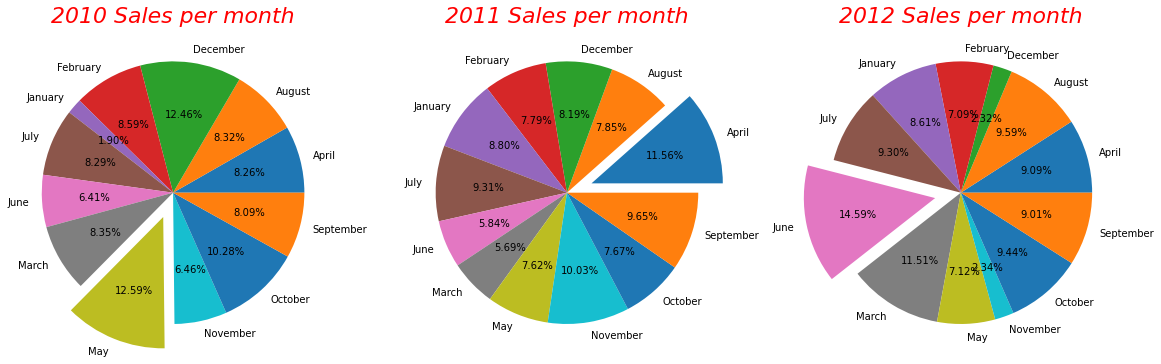

In [102]:
# The highest monthly sales in each year
plt.figure(figsize=(20,15)) 
df1= df[df['year']==2010]
df2= df[df['year']==2011]
df3= df[df['year']==2012]
ddf=[df1, df2, df3]
years=['2010', '2011', '2012']
for i in range(0,len(ddf)):   
    figure= plt.subplot(1,3,i+1)
    val = ddf[i].groupby('month')['Weekly_Sales'].sum().values
    max_val=max(val)
    explode_value = tuple([0 if val[j] != max_val else 0.2 for j in range(len(val))])
    plt.pie(val, labels=ddf[i].groupby('month')['Weekly_Sales'].sum().index, autopct='%.2f%%', explode=explode_value)
    plt.title(f'{years[i]} Sales per month', color='red', fontsize= 22, fontstyle='italic')

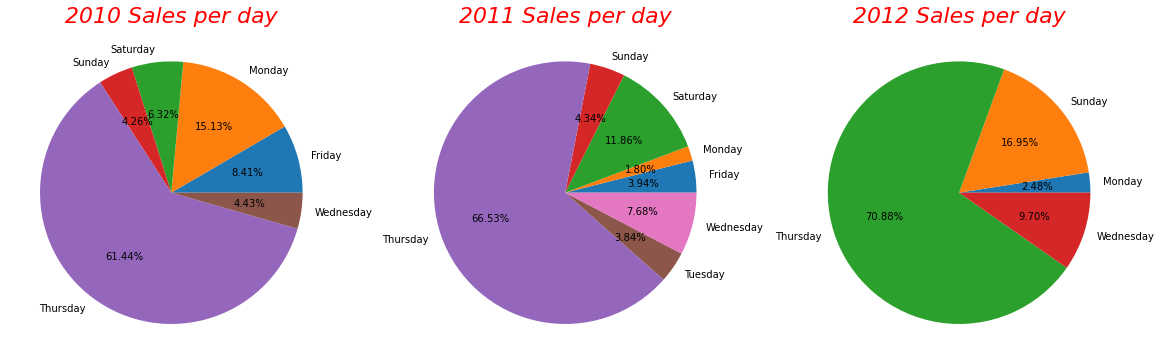

In [103]:
# The highest daily sales in each year
plt.figure(figsize=(20,15)) 
df1= df[df['year']==2010]
df2= df[df['year']==2011]
df3= df[df['year']==2012]
ddf=[df1, df2, df3]
years=['2010', '2011', '2012']
for i in range(0,len(ddf)):
    figure= plt.subplot(1,3,i+1)
    plt.pie(ddf[i].groupby('day')['Weekly_Sales'].sum().values, labels=ddf[i].groupby('day')['Weekly_Sales'].sum().index, autopct='%.2f%%')
    plt.title(f'{years[i]} Sales per day', color='red', fontsize= 22, fontstyle='italic')

In [104]:

sales=df.groupby(['year','month'])['Weekly_Sales'].sum().to_frame()
df_sales=pd.DataFrame(sales)
df_sales=df_sales.reset_index()
df_sales

,year,month,Weekly_Sales
0,2010,April,173226304.180000
1,2010,August,174453098.270000
2,2010,December,261420431.560000
3,2010,February,180212497.260000
4,2010,January,39825602.620000
5,2010,July,173979790.980000
6,2010,June,134496227.240000
7,2010,March,175232904.620000
8,2010,May,264077638.850000
9,2010,November,135502438.680000


Text(0.5, 1.0, 'Total sales over the three years')

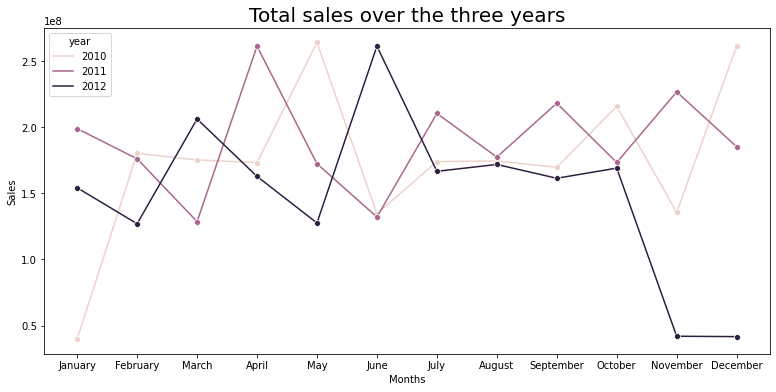

In [105]:
from calendar import month_name as mn
monthss = mn[1:]
df_sales.month = pd.Categorical(df_sales.month, categories=monthss, ordered=True)
plt.figure(figsize=(13,6))
p=sns.lineplot(data=df_sales, x='month', y='Weekly_Sales', hue='year', marker='o', ci=None)
plt.xlabel("Months")
plt.ylabel("Sales")
plt.title('Total sales over the three years', fontsize=20)

In 2010, sales jumped significantly in February and December, while sharply dropping occurred in november 2012 and stay stable on that level until the end of year.

In [106]:
# The Top 10 stores in total sales over all years
df.groupby(['Store'])['Weekly_Sales'].sum().to_frame().sort_values(by='Weekly_Sales', ascending=False).head(10).reset_index()


,Store,Weekly_Sales
0,20,280023734.810000
1,14,276127584.780000
2,2,268722063.500000
3,13,268202470.390000
4,10,255678877.440000
5,27,248038735.050000
6,4,244648709.650000
7,1,222402808.850000
8,6,221028555.460000
9,39,207445542.470000


In [107]:
# The Top 3 stores in total sales in 2010
df1.groupby(['Store'])['Weekly_Sales'].sum().to_frame().sort_values(by='Weekly_Sales', ascending=False).head(3).reset_index()


,Store,Weekly_Sales
0,14,95958984.810000
1,2,91841856.510000
2,20,89583444.000000


In [108]:
# The Top 3 stores in total sales in 2011
df2.groupby(['Store'])['Weekly_Sales'].sum().to_frame().sort_values(by='Weekly_Sales', ascending=False).head(3).reset_index()


,Store,Weekly_Sales
0,14,102727201.710000
1,4,101639804.850000
2,20,100612581.430000


In [109]:
# The Top 3 stores in total sales in 2012
df3.groupby(['Store'])['Weekly_Sales'].sum().to_frame().sort_values(by='Weekly_Sales', ascending=False).head(3).reset_index()


,Store,Weekly_Sales
0,20,89827709.380000
1,13,86707455.020000
2,2,81496695.370000


In [118]:
# Total Sales vs Fuel Price
df.groupby('Fuel_Price')['Weekly_Sales'].sum().to_frame().sort_values(by='Weekly_Sales', ascending=False)

,Weekly_Sales
Fuel_Price,
High,3332621595.040000
Low,2816993632.870000


In [114]:
# Total Sales vs CPI
df.groupby('CPI')['Weekly_Sales'].sum().to_frame().sort_values(by='Weekly_Sales', ascending=False)

,Weekly_Sales
CPI,
High,3286055335.410000
Low,2863559892.500000


Walmart earn more when the Fuel price and CPI are too high.


In [115]:
# Total Sales vs Temperature
df.groupby('Temperature')['Weekly_Sales'].sum().to_frame().sort_values(by='Weekly_Sales', ascending=False)


,Weekly_Sales
Temperature,
Hot,2759107522.620000
Warm,2023665815.050000
Cool,1176643757.130000
Cold,190198133.110000


People spend more money in walmart in hot and warm weather.

In [117]:
# Total Sales vs Holiday_Flag
df.groupby('Holiday_Flag')['Weekly_Sales'].sum().to_frame().sort_values(by='Weekly_Sales', ascending=False)

,Weekly_Sales
Holiday_Flag,
Non-holiday week,5704332719.920000
Holiday week,445282507.990000


Usually, people prefer to buy their needs from walmart earlier before the holiday week.